# Лабораторна робота 5

## Виконано студенкою групи АнД-41
## Бовсуновською Марією
## Варіант 3


## Завдання
Частина 1 (частина 2 буде отримана після лекції 7)
- Виконати вирішення задачs класифікації для 3 класів з набору даних food101 з використанням різних моделей нейронних мереж:
1) CNN модель з лабораторної роботи 4
2) Resnet модель
3) Efficientnet модель (моделі 1-3 з використанням оптимізатора Adam)
4) (5) Моделі 2-3 з використанням оптимізатора SGD.
5) (6, 7)(Частина 2) Моделі 2,3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)

- Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи

- Порівняти результати моделювання із використанням TensorBoard
- Графік(и) порівняння результатів завантажити у форматі .svg та вставити у підсумковий файл поряд із та відповідними висновками
- Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
- Результати викласти у репозиторії GitHub (папка Lab5).
- Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Варіант классів: 2 32 62
## 'baklava', 'dumplings', 'macaroni_and_cheese'

- model_1 cnn Adam

- model_2 resnet Adam
- model_3 efficientnet Adam

- model_4 resnet SGV
- model_5 efficientnet SGV

- model_6 resnet last_10_trainable
- model_7 efficientnet last_10_trainable

In [5]:

import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
tf.random.set_seed(0)
seed=0

from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM
from IPython.utils import io




In [6]:


def print_img(file_short):

    file_name_acc="epoch_accuracy_"+file_short
    file_name_los="epoch_loss_"+file_short

    base="tfb_img/"
    with io.capture_output() as captured:
        drawing = svg2rlg(base+file_name_acc+".svg")
        renderPM.drawToFile(drawing, base+file_name_acc+".png", fmt="PNG")
        drawing = svg2rlg(base+file_name_los+".svg")
        renderPM.drawToFile(drawing, base+file_name_los+".png", fmt="PNG")

    tfb_img_dir="D:/00KNU/4_kurs/4_1_neuro/LAB5/tfb_img/"
    
    
    fig, (ax, ax1) = plt.subplots(1,2)
    ax.imshow(plt.imread(matplotlib.cbook.get_sample_data(tfb_img_dir+file_name_acc+".png")))
    ax.set_title(file_name_acc)
    ax1.imshow(plt.imread(matplotlib.cbook.get_sample_data(tfb_img_dir+file_name_los+".png")))
    ax1.set_title(file_name_los)
    fig.set_figwidth(20)
    fig.set_figheight(20)  
    plt.show()



### Умовні позначення:
#### - Помаранчевий - тестові дані
#### - Синій - валідаційні дані

In [1]:
%load_ext tensorboard

# # url
# http://localhost:6006/

# # need to delete all from
# C:\Users\1\AppData\Local\Temp\.tensorboard-info

In [2]:
%reload_ext tensorboard

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/CNN_Adam/'

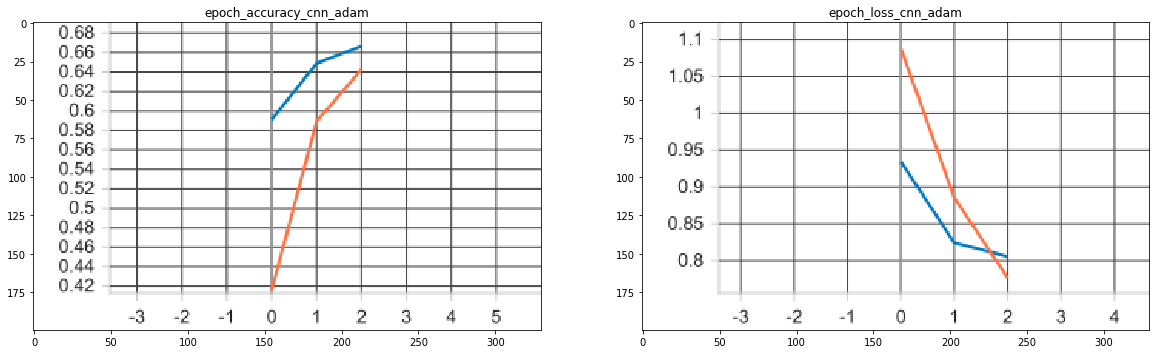

In [7]:
print_img("cnn_adam")

У порівнянні з моделями далі CNN показує найгіршу точність та втрати

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/efficientnet_10_adam/'

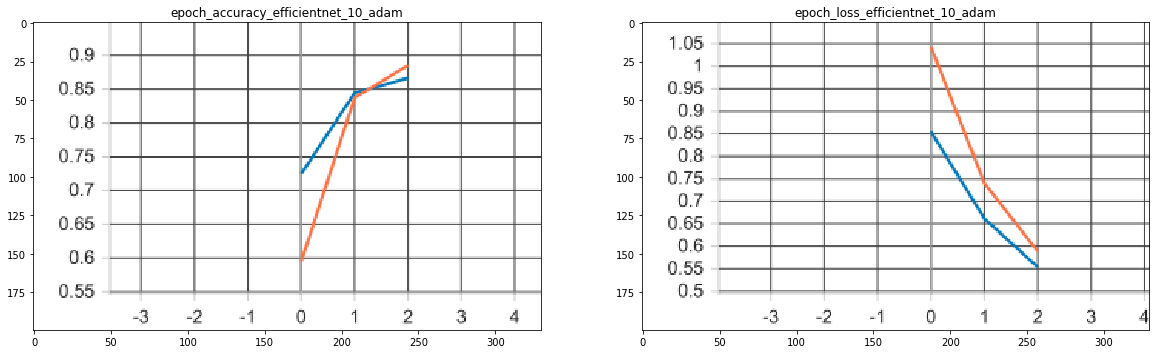

In [8]:
print_img("efficientnet_10_adam")

тут відсутнє перетреування, яке характерне для обох efficientnet моделей із забороною навчання шарів, але в той же час її показники гірші, а саме - дуже великі втрати

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/efficientnet_Adam/'

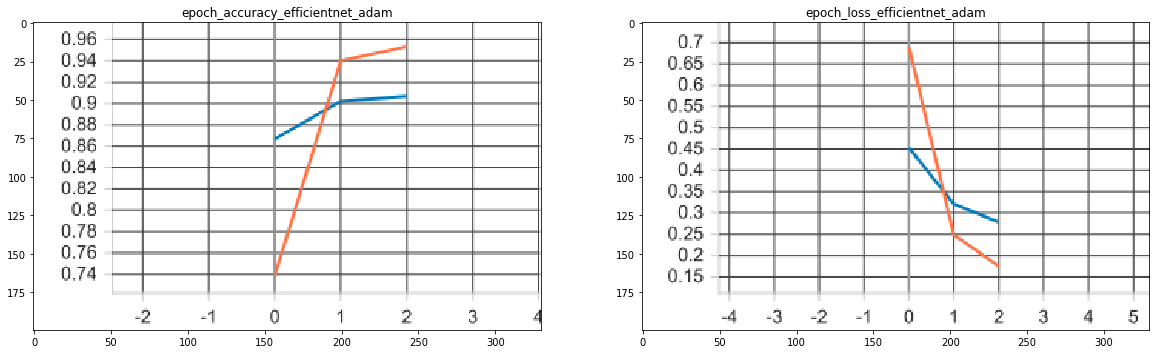

In [9]:
print_img("efficientnet_adam")

У моделі наявне перетренування, яке на точності не дуже помітне, та і не дуже суттєве, але на втратах це дуже просто помітити

In [ ]:
# # %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/efficientnet_SGD/'

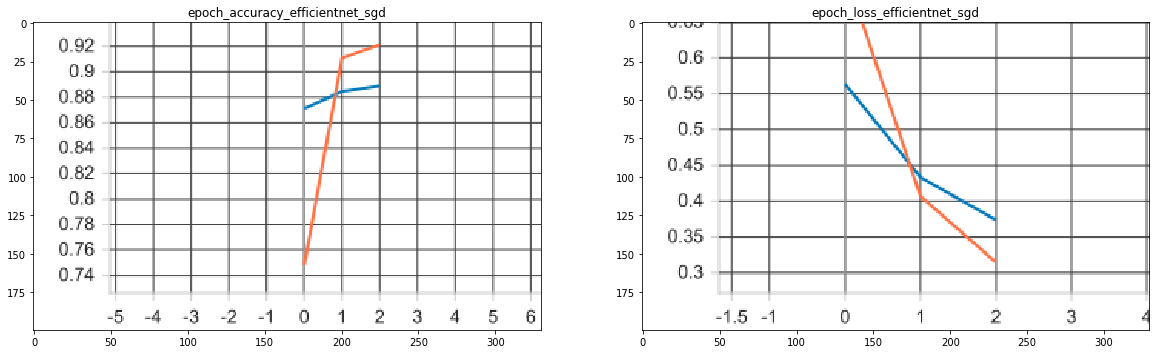

In [10]:
print_img("efficientnet_sgd")

результати схожі на результати efficientnet з оптимізатором Adam, але гірші. Теж наявне перетренування моделі.

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/resnet_10_adam/'

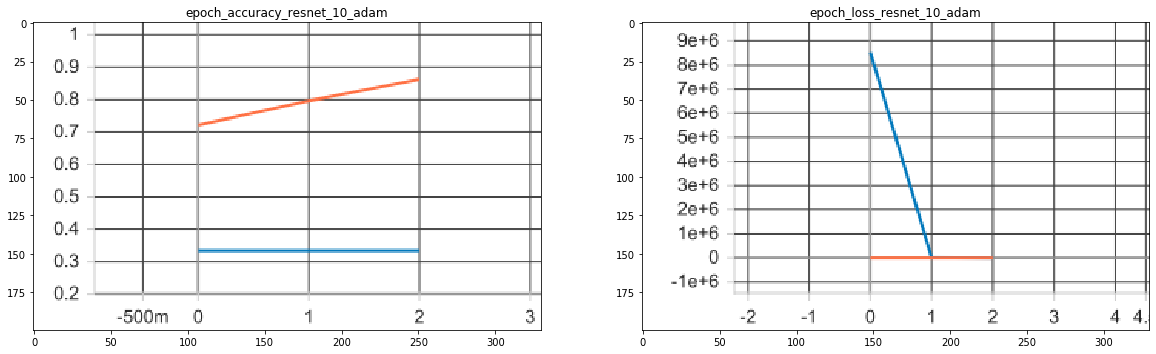

In [11]:
print_img("resnet_10_adam")

Дивні результати, не знаю з чим пов'язані. Жодна інша модель так себе не вела. 

Загальна точність на тренувальних даних не залежить від кількості епох  і становить 0,333, що являється вгадуванням в данй задачі, адже це трикласова класифікація.

Функція втрат в той же час показує, що FN втрати відсутні взагалі.

На захисті одногрупників було висунуто можливу причину - змінити постановку задачі для моделі, замість loss=categorical_crossentropy при тренуванні моделі.

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/resnet_Adam/'

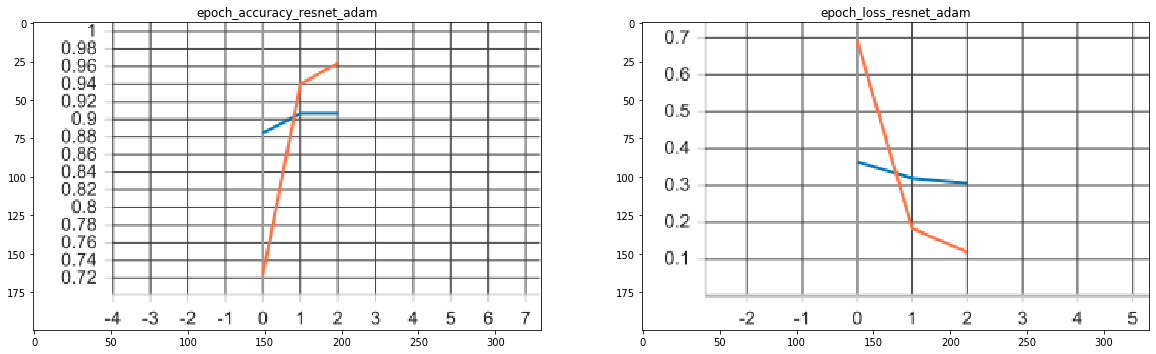

In [12]:
print_img("resnet_adam")

Відбулося явне перетренування моделі. Точність все ще висока, а втрати невисокі. Загалом ця модель показала себе трошки-трошки гірше за efficientnet з таким же оптимізатором.

In [ ]:
# %reload_ext tensorboard
# %tensorboard --logdir='./tensorboard_callback/resnet_SGD/'

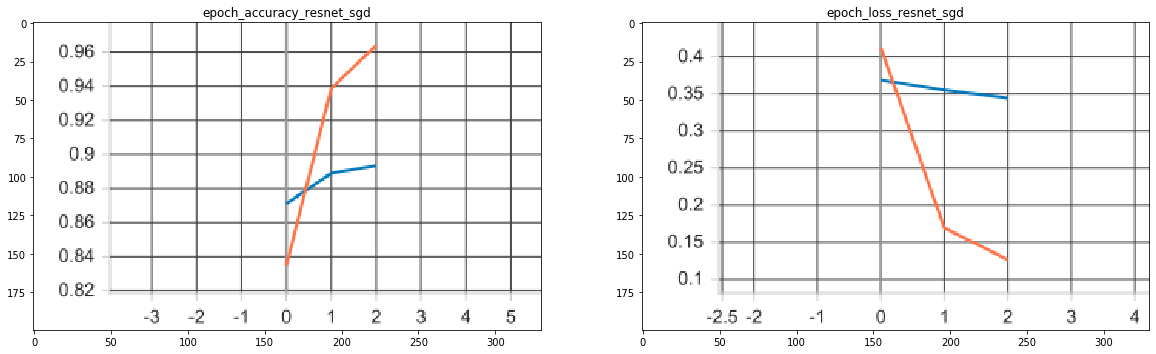

In [13]:
print_img("resnet_sgd")

Знову видно перетренування моделі. Результати все ще гірші за той же тип моделі з оптимізатором Adam. Якщо порінбвати із effitientnet з тим же оптимізатором, то тут точність трошечки краще, а втрати більші.

Виходячи з розгляду усіх результатів, підведемо підсумки для поставленої задачі мультикласової класифікації:
- CNN - працює суттєво швидше за інші моделі, але результати найгірші
- Отптимізатор Adam показав себе кращим за SGD
- Модель efficientnet показала себе краще за resnet
- Моделі з натренованими останніми десятьма шарами (на прикладі efficientnet) уникають перетренування, але, на жаль, показують гірші результати за попередньо натреновану модель.
- Найкраща модель для розв'язання даної задачі - efficientnet з оптимізатором Adam.